## Model Definition, Training and Evaluation
1. Import required packages
2. Import data
3. Perform data transformation and feature engineering
4. Create train and test split and feature scaling
5. Train Models
6. Evaluate models using model score on test data
7. Perform feature selection using feature importance and correlation between features
8. Select the highest scoring model and perform model parameter tuning
9. Finalize the model for deployment

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

Data is available at the [UCI ML Website](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction)

In [2]:
# Importing the data file

df = pd.read_csv('energydata_complete.csv', parse_dates=['date'])

In [3]:
# Drop random variables as they are not used for prediction

df.drop(['rv1', 'rv2'], axis=1, inplace=True)

In [4]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [5]:
df.shape

(19735, 27)

In [6]:
df_train = df[df['date']<'2016-04-10']
df_train.shape

(12858, 27)

In [7]:
df_test = df[df['date']>='2016-04-10']
df_test.shape

(6877, 27)

### Creating Hour, Weekday and Month from Date
Use the date column to extract hour of day, day of the week and month to use any hourly, weekly and monthly patterns.

In [8]:
# Extracting hour of day, day of week and month from date

df['hour'] = df.date.dt.hour
df['weekday'] = df.date.dt.dayofweek
df['month'] = df.date.dt.month

#df_train['hour'] = df_train.date.dt.hour
#df_train['weekday'] = df_train.date.dt.dayofweek
#df_train['month'] = df_train.date.dt.month

#df_test['hour'] = df_test.date.dt.hour
#df_test['weekday'] = df_test.date.dt.dayofweek
#df_test['month'] = df_test.date.dt.month

### Transforming existing features
1. Create Log of energy use by appliances
2. Create average of inside and outside temperatures that are highly correlated with each other
3. Create difference between inside and outside temperatures
4. Create average of inside and outside humidity that are highly correlated with each other
5. Create difference between inside and outside humidity
6. Create one hot encoding (using dummies) for categorical data of hour, weekday, and month 
7. Split the data into training and testing data sets
8. Scale the data using Min-Max scaler because it preserves the one-hot encoding
9. Transforming the Train and Test data using the scaler
10. Making the y values 1 dimentional numpy arrays to be used in models

In [9]:
# Calculating log of appliance energy use column

df['log_energy'] = np.log(df['Appliances'])

#df_train['log_energy'] = np.log(df_train['Appliances'])

#df_test['log_energy'] = np.log(df_test['Appliances'])

In [10]:
# Calculating average of inside Temperature and Humidity

Temp_in = ['T1','T3','T4','T5','T7','T8','T9']
Hum_in = ['RH_1','RH_3','RH_4','RH_7','RH_8','RH_9']

df['Temp_in'] = np.nanmean(df[Temp_in], axis=1)
df['Hum_in'] = np.nanmean(df[Hum_in], axis=1)

#df_train['Temp_in'] = np.nanmean(df_train[Temp_in], axis=1)
#df_train['Hum_in'] = np.nanmean(df_train[Hum_in], axis=1)

#df_test['Temp_in'] = np.nanmean(df_test[Temp_in], axis=1)
#df_test['Hum_in'] = np.nanmean(df_test[Hum_in], axis=1)

In [11]:
# Calculating difference between inside and outside temperature and humidity

df['Temp_diff'] = np.abs(df['T_out'] - df['Temp_in'])
df['Hum_diff'] = np.abs(df['RH_out'] - df['Hum_in'])

#df_train['Temp_diff'] = np.abs(df_train['T_out'] - df_train['Temp_in'])
#df_train['Hum_diff'] = np.abs(df_train['RH_out'] - df_train['Hum_in'])

#df_test['Temp_diff'] = np.abs(df_test['T_out'] - df_test['Temp_in'])
#df_test['Hum_diff'] = np.abs(df_test['RH_out'] - df_test['Hum_in'])

In [12]:
# Selecting X and Y columns before creating dummies

X_cols = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
          'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed','Visibility', 'Tdewpoint', 'hour',
          'Temp_in', 'Hum_in', 'Temp_diff', 'Hum_diff', 'weekday', 'month']
y_col = ['log_energy']


X = df[X_cols]
y = df[y_col]

#X_train = df_train[X_cols]
#y_train = df_train[y_col]

#X_test = df_test[X_cols]
#y_test = df_test[y_col]

In [13]:
# Creating one-hot encoding for hour, dayofweek and month using dummies. 

X = pd.concat([X, pd.get_dummies(df.hour, prefix='h')], axis=1)
X = pd.concat([X, pd.get_dummies(df.weekday, prefix='w')], axis=1)
X = pd.concat([X, pd.get_dummies(df.month, prefix='m')], axis=1)

#X_train = pd.concat([X_train, pd.get_dummies(df_train.hour, prefix='h')], axis=1)
#X_train = pd.concat([X_train, pd.get_dummies(df_train.weekday, prefix='w')], axis=1)
#X_train = pd.concat([X_train, pd.get_dummies(df_train.month, prefix='m')], axis=1)

#X_test = pd.concat([X_test, pd.get_dummies(df_test.hour, prefix='h')], axis=1)
#X_test = pd.concat([X_test, pd.get_dummies(df_test.weekday, prefix='w')], axis=1)
#X_test = pd.concat([X_test, pd.get_dummies(df_test.month, prefix='m')], axis=1)

In [15]:
# Dropping hour, weekday and month columns after creating dummies

X = X.drop(['hour', 'weekday'], axis=1)

#X_train = X_train.drop(['hour', 'weekday'], axis=1)

#X_test = X_test.drop(['hour', 'weekday'], axis=1)

In [16]:
# Creating Training and Test data split with 30% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
# Creating the Min-Max scaler and transforming features

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Making y values numpy 1-dimentional arrays

y_train = y_train['log_energy'].ravel()
y_test = y_test['log_energy'].ravel()

## Model Evaluation with all features without selection

### Using Liner Regression Models
1. Using Linear Regression
2. Using Ridge Regression
3. Using Lasso Regression

In [19]:
# Simple linear regression

lin = linear_model.LinearRegression()
lin.fit(X_train, y_train)
lin.score(X_test, y_test)

0.36217805051008434

In [20]:
# Ridge regression

ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.36082677207687475

In [21]:
# Lasso Regression

lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

-7.24825647790972e-06

### Using Support Vector Machine Regression Model

In [22]:
# Support Vector Machine regression

svr = svm.SVR(gamma='scale')
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.49374028245274015

### Using Decision Tree Regression Model

In [23]:
# Iterating and iterating max_depth to improve score

tree = DecisionTreeRegressor(max_depth= 40, random_state=42)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.46393877230718517

### Using Decision Tree Ensemble Models
1. Gradient Boost Regression
2. Ada Boost Regression
3. Extra Trees Regression
4. Random Forest Regression
5. Bagging Regression

In [24]:
# Using gradient boost regressor

gbr = GradientBoostingRegressor(max_depth= 30, random_state=42)
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)

0.5645490428697326

In [25]:
# Using Ada Boost regressor

abr = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=30), n_estimators=200, random_state=42)
abr.fit(X_train, y_train)
abr.score(X_test, y_test)

0.6807920551729432

In [26]:
# Using Extra Trees regressor (Model of choice with highest score)

etr = ExtraTreesRegressor(n_estimators=100, random_state=42, max_depth=30)
etr.fit(X_train, y_train)
etr.score(X_test, y_test)

0.7160909731058722

In [27]:
# Using Random Forest regressor

rfr = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=30)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.695451240836741

In [28]:
# Using Bagging regressor

br = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=30), n_estimators=100, random_state=42)
br.fit(X_train, y_train)
br.score(X_test, y_test)

0.6956911368576681

### Using Feature Importance to perform feature selection
Iterative process to reduce features for higher accuracy and prevent overfitting
1. Use all the features
2. Run feature importance and drop least performing features
3. Rerun the model with reduced features, check for accuracy and run feature importance
4. Iterate and finalize on select minimum features with reasonable accuracy

In [29]:
# Use feature importance method for Extra Trees Regressor

etr.feature_importances_

array([0.02092544, 0.02247512, 0.0337289 , 0.02167002, 0.02867838,
       0.02534775, 0.02082608, 0.01987523, 0.01942204, 0.02195628,
       0.01858501, 0.02291267, 0.01657202, 0.01875706, 0.02743211,
       0.02084878, 0.01534572, 0.02081001, 0.01794193, 0.02220342,
       0.03220155, 0.02288936, 0.01801105, 0.01828325, 0.01975944,
       0.01779715, 0.0187473 , 0.03410802, 0.00756334, 0.00281446,
       0.00189555, 0.00185947, 0.00237277, 0.00184645, 0.00231338,
       0.00311196, 0.00544233, 0.01103321, 0.01106268, 0.01274924,
       0.01270189, 0.01316211, 0.01150549, 0.00830182, 0.00592009,
       0.00854586, 0.02203327, 0.05099218, 0.02922795, 0.022485  ,
       0.01085591, 0.0043689 , 0.00332811, 0.01167849, 0.00957422,
       0.00964026, 0.00655321, 0.0172705 , 0.01317828, 0.00925141,
       0.01190397, 0.00752233, 0.0067167 , 0.00758046, 0.00352568])

In [30]:
# Sort the list with descending importance

list(sorted(zip(etr.feature_importances_, df_train.columns), reverse=True))

[(0.033728903516135195, 'lights'),
 (0.032201550796516785, 'RH_9'),
 (0.02867838491189133, 'RH_1'),
 (0.027432113678804493, 'RH_6'),
 (0.02534775159333698, 'T2'),
 (0.0229126656107869, 'T5'),
 (0.022889362806362855, 'T_out'),
 (0.022475123757546057, 'Appliances'),
 (0.022203424933360468, 'T9'),
 (0.021956279340435647, 'T4'),
 (0.021670022571033773, 'T1'),
 (0.020925443473205903, 'date'),
 (0.02084877831985929, 'T7'),
 (0.02082608202381796, 'RH_2'),
 (0.020810006313232564, 'T8'),
 (0.01987522554016564, 'T3'),
 (0.019759443708463373, 'Windspeed'),
 (0.019422038441540956, 'RH_3'),
 (0.018757063475978292, 'T6'),
 (0.01874729914504812, 'Tdewpoint'),
 (0.018585010120459378, 'RH_4'),
 (0.01828324501581101, 'RH_out'),
 (0.018011046579036825, 'Press_mm_hg'),
 (0.01794192707267484, 'RH_8'),
 (0.017797145149226316, 'Visibility'),
 (0.016572016620074702, 'RH_5'),
 (0.015345719976727694, 'RH_7')]

### Observations
1. Week of day dummy variables do not have much effect
2. Month dummy variables do not have much effect
3. Only h_17, h_18, h_19, and h_20 are significant

### Removing Date Time Dummy Variables
Running the model after removing most of the dummy variables created using date time

In [31]:
# Removing all insignificant hourly (except 17, 18, 19, 20), day of week and monthly dummy variables including T7 and T9

X = X.drop(['w_4','T7','T9','m_1','h_12','h_10','w_5','h_11','w_0','h_13','h_8','h_9','h_21','w_2','w_1','h_16','w_6',
            'm_4','h_14','m_2','m_3','w_3','h_15','h_7','m_5','h_22','h_23','h_6','h_0','h_3','h_5','h_1','h_4','h_2'], axis=1)
X.shape

(19735, 31)

In [32]:
# Creating Training and Test data with scaling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train['log_energy'].ravel()
y_test = y_test['log_energy'].ravel()

In [33]:
# Using Extra Trees regressor (Model of choice with highest score)

etr = ExtraTreesRegressor(n_estimators=100, random_state=42, max_depth=30)
etr.fit(X_train, y_train)
etr.score(X_test, y_test)

0.7350993269543573

In [34]:
# Sort the list with descending importance

list(sorted(zip(etr.feature_importances_, X.columns), reverse=True))

[(0.049990492138876616, 'h_18'),
 (0.04469618069592261, 'T2'),
 (0.04331872397668422, 'RH_8'),
 (0.0422727864362691, 'T3'),
 (0.0393693868712934, 'RH_out'),
 (0.038819608129326555, 'RH_1'),
 (0.03729345986204833, 'RH_3'),
 (0.036523526546882366, 'T8'),
 (0.03505146416395788, 'RH_5'),
 (0.034525406371871674, 'Hum_diff'),
 (0.03423103857779962, 'Press_mm_hg'),
 (0.03381985289992244, 'T4'),
 (0.03264829933637207, 'T6'),
 (0.03205499074412969, 'RH_9'),
 (0.03203697934919531, 'Windspeed'),
 (0.031342523257705035, 'T1'),
 (0.030742399768750577, 'RH_2'),
 (0.03070970436885609, 'RH_6'),
 (0.030545386760892634, 'T5'),
 (0.028442171990666426, 'RH_4'),
 (0.028431053114052095, 'RH_7'),
 (0.028414276384681515, 'Temp_in'),
 (0.028163503341263194, 'Tdewpoint'),
 (0.02806122578971622, 'Temp_diff'),
 (0.02774228363270772, 'h_19'),
 (0.02581111473061579, 'Hum_in'),
 (0.025429574594068145, 'T_out'),
 (0.02360191518209992, 'month'),
 (0.023484196884910043, 'Visibility'),
 (0.02162778786860775, 'h_20'),
 (

### Observations
1. The score improved from 0.718 to 0.736
2. Top 3 features are h_18, RH_8 and T3

### Removing sensor readings that are correlated
Removing highly correlated sensor reading that are listed below in the feature importance

In [35]:
# Removing correlated temperature and humidity features 
# temperatures 'T4','T1','T5','T8' have correlation 0.8 and higher with T3. 'T_out' has correlation 0.97 with T6
# humidity 'RH_3','RH_7','RH_4','RH_9' have correlation 0.8 and higher with RH_8. 'RH_6' removed due to detected sensor failure

X2 = X[['h_18','RH_8','T3','T2','RH_1','RH_out','Hum_diff','Press_mm_hg','RH_5','Windspeed','T6','RH_2','Temp_in',
       'Tdewpoint','h_19','Temp_diff','Hum_in','Visibility','h_20','h_17']]
X2.shape

(19735, 20)

In [36]:
# Creating Training and Test data with scaling

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 42)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train['log_energy'].ravel()
y_test = y_test['log_energy'].ravel()

In [37]:
# Using Extra Trees regressor (Model of choice with highest score)

etr = ExtraTreesRegressor(n_estimators=100, random_state=42, max_depth=30)
etr.fit(X_train, y_train)
etr.score(X_test, y_test)

0.733602221039977

In [38]:
# Sort the list with descending importance

list(sorted(zip(etr.feature_importances_, X2.columns), reverse=True))

[(0.06590631374075648, 'T2'),
 (0.06574468088178978, 'RH_8'),
 (0.06478297799395591, 'Temp_in'),
 (0.06469731360593739, 'T3'),
 (0.0610524300455174, 'RH_1'),
 (0.05853778081997441, 'Press_mm_hg'),
 (0.0539649820457569, 'RH_5'),
 (0.05327183445687409, 'Hum_diff'),
 (0.05301968464224224, 'T6'),
 (0.052866952535344514, 'RH_out'),
 (0.051552527659932366, 'Windspeed'),
 (0.05055474285534717, 'RH_2'),
 (0.04989583358249955, 'Hum_in'),
 (0.04980337746482072, 'h_18'),
 (0.04953328059244196, 'Tdewpoint'),
 (0.04853517385534072, 'Temp_diff'),
 (0.035551505293224046, 'Visibility'),
 (0.028095312284706308, 'h_19'),
 (0.021971515413177753, 'h_20'),
 (0.0206617802303603, 'h_17')]

### Observations
1. Score marginally dropped from 0.736 to 0.735
2. Top 3 features are T2, RH_8 and Temp_in
3. h_18, which was the top feature in last iteration has dropped in importance considerably

### Removing more hour dummy variables
Removing h_19, h_20 and h_17 with the lowest importance

In [39]:
# Removing h_19, h_20, h_17 (importance less than 0.03)

X2 = X[['h_18','RH_8','T3','T2','RH_1','RH_out','Hum_diff','Press_mm_hg','RH_5','Windspeed','T6','RH_2','Temp_in',
       'Tdewpoint','Temp_diff','Hum_in','Visibility']]
X2.shape

(19735, 17)

In [40]:
# Creating Training and Test data with scaling

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 42)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train['log_energy'].ravel()
y_test = y_test['log_energy'].ravel()

In [41]:
# Using Extra Trees regressor (Model of choice with highest score)

etr = ExtraTreesRegressor(n_estimators=100, random_state=42, max_depth=30)
etr.fit(X_train, y_train)
etr.score(X_test, y_test)

0.7347558914863208

In [42]:
# Sort the list with descending importance

list(sorted(zip(etr.feature_importances_, X2.columns), reverse=True))

[(0.08096652952180734, 'RH_8'),
 (0.07633570509445325, 'T2'),
 (0.07063447408219199, 'RH_1'),
 (0.06784966989122485, 'T3'),
 (0.06753269755630815, 'Temp_in'),
 (0.06269240692960215, 'Press_mm_hg'),
 (0.05769243400746395, 'RH_5'),
 (0.056823182648422316, 'Hum_diff'),
 (0.054343961075540494, 'Hum_in'),
 (0.054246934245009586, 'T6'),
 (0.05382328468042783, 'RH_out'),
 (0.053686560834670286, 'Windspeed'),
 (0.053149601986313195, 'RH_2'),
 (0.05188760240613721, 'Tdewpoint'),
 (0.04997463177647174, 'h_18'),
 (0.049398983247331565, 'Temp_diff'),
 (0.03896134001662408, 'Visibility')]

### Observations
1. Score was not affected
2. Top features remain same
3. Last remaining date time feature h_18 can be removed as it is in bottom 3

### Removing last date time related variable and additional features
Removing h_18 and Temp_diff and Visibility

In [43]:
# Removing h_18, Temp_diff, Visibility (importance less than 0.05)

X2 = X[['RH_8','T3','T2','RH_1','RH_out','Hum_diff','Press_mm_hg','RH_5','Windspeed','T6','RH_2','Temp_in',
       'Tdewpoint','Hum_in']]
X2.shape

(19735, 14)

In [44]:
# Creating Training and Test data with scaling

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 42)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train['log_energy'].ravel()
y_test = y_test['log_energy'].ravel()

In [45]:
# Using Extra Trees regressor (Model of choice with highest score)

etr = ExtraTreesRegressor(n_estimators=100, random_state=42, max_depth=30)
etr.fit(X_train, y_train)
etr.score(X_test, y_test)

0.7411353040032742

In [46]:
# Sort the list with descending importance

list(sorted(zip(etr.feature_importances_, X2.columns), reverse=True))

[(0.09347385797546856, 'RH_8'),
 (0.08647126014688934, 'T2'),
 (0.0812378508721741, 'RH_1'),
 (0.07928148682635396, 'Temp_in'),
 (0.07779515823688671, 'T3'),
 (0.07282857318297609, 'Press_mm_hg'),
 (0.07077798998526916, 'RH_out'),
 (0.06511904452557839, 'T6'),
 (0.06441012662607373, 'RH_2'),
 (0.06382065285487894, 'RH_5'),
 (0.06294578352922836, 'Hum_diff'),
 (0.06273213470182203, 'Tdewpoint'),
 (0.05984350784139062, 'Windspeed'),
 (0.05926257269501015, 'Hum_in')]

### Observations
1. Score improved from 0.735 to 0.738
2. Top 3 features are RH_8, T2 and RH_1

### Removing correlated features in the final feature set
Removing correlated features, focusing on removing calculated features

In [47]:
# Creating final feature set

X2 = X[['RH_8','T2','RH_1','Temp_in','T3','Press_mm_hg','RH_out','T6','RH_2','Hum_diff','RH_5','Tdewpoint','Hum_in','Windspeed']]
X2.shape

(19735, 14)

In [48]:
# Correlation between all final features

#X2_corr = X2.corr()
#round(X2_corr,2)
X2.corr()

,RH_8,T2,RH_1,Temp_in,T3,Press_mm_hg,RH_out,T6,RH_2,Hum_diff,RH_5,Tdewpoint,Hum_in,Windspeed
RH_8,1.000000,0.068534,0.736196,-0.091230,0.044427,-0.225591,0.487355,0.073721,0.679777,0.250538,0.359840,0.501775,0.930258,0.202380
T2,0.068534,1.000000,0.269839,0.750883,0.735245,-0.133028,-0.505291,0.801186,-0.165610,-0.598665,0.029595,0.582602,0.191703,0.052495
RH_1,0.736196,0.269839,1.000000,0.124128,0.253230,-0.293957,0.274126,0.316141,0.797535,0.028397,0.303258,0.639106,0.891651,0.204932
Temp_in,-0.091230,0.750883,0.124128,1.000000,0.937255,-0.151229,-0.353404,0.666419,0.023442,-0.376067,-0.078491,0.569763,-0.011784,-0.169654
T3,0.044427,0.735245,0.253230,0.937255,1.000000,-0.189974,-0.281718,0.686882,0.137319,-0.340740,-0.066355,0.645886,0.130780,-0.100776
Press_mm_hg,-0.225591,-0.133028,-0.293957,-0.151229,-0.189974,1.000000,-0.092017,-0.141643,-0.255646,-0.024725,-0.119327,-0.244098,-0.260043,-0.235032
RH_out,0.487355,-0.505291,0.274126,-0.353404,-0.281718,-0.092017,1.000000,-0.569119,0.584911,0.960653,0.185941,0.036506,0.398642,-0.176458
T6,0.073721,0.801186,0.316141,0.666419,0.686882,-0.141643,-0.569119,1.000000,-0.009670,-0.672901,-0.078337,0.764242,0.209610,0.169185
RH_2,0.679777,-0.165610,0.797535,0.023442,0.137319,-0.255646,0.584911,-0.009670,1.000000,0.403422,0.250271,0.499152,0.757464,0.069190
Hum_diff,0.250538,-0.598665,0.028397,-0.376067,-0.340740,-0.024725,0.960653,-0.672901,0.403422,1.000000,0.093582,-0.139437,0.133792,-0.266535


### Observations
1. Hum_in is correlated with RH_8 at 0.93 and can be removed
2. Hum_diff is correlated with RH_out at 0.96 and can be removed
3. Temp_in is correlated with T3 at 0.94 and can be removed

### Removing correlated calculated features
Calculated features such as Hum_in, Hum_diff and Temp_in can be removed

In [49]:
# Removing calculated correlated features

X2 = X[['RH_8','T2','RH_1','T3','Press_mm_hg','RH_out','T6','RH_2','RH_5','Tdewpoint','Windspeed']]
X2.shape

(19735, 11)

In [50]:
# Creating Training and Test data with scaling

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 42)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train['log_energy'].ravel()
y_test = y_test['log_energy'].ravel()

In [51]:
# Using Extra Trees regressor (Model of choice with highest score)

etr = ExtraTreesRegressor(n_estimators=100, random_state=42, max_depth=30)
etr.fit(X_train, y_train)
etr.score(X_test, y_test)

0.7402793722330447

In [52]:
# Sort the list with descending importance

list(sorted(zip(etr.feature_importances_, X2.columns), reverse=True))

[(0.11455665396480602, 'RH_8'),
 (0.10377691156653243, 'T2'),
 (0.10205562093028077, 'RH_1'),
 (0.0977471026753053, 'RH_out'),
 (0.09620342411419129, 'T3'),
 (0.09202571913111797, 'Press_mm_hg'),
 (0.08228720681238219, 'T6'),
 (0.08073008035983494, 'RH_2'),
 (0.079462656422798, 'Tdewpoint'),
 (0.07648654814019924, 'RH_5'),
 (0.07466807588255171, 'Windspeed')]

### Observations
1. Decrease in score from 0.738 to 0.736
2. Increased Model simplification, no need to calculate new features

### Using Standard Scaler instead of Min-Max scaler
Using standard scaler for feature scaling as dummy variables are no longer used

In [53]:
# Selecting final variables

X_cols = ['RH_8','T2','RH_1','RH_out','T3','Press_mm_hg','T6','RH_2','Tdewpoint','RH_5','Windspeed']
y_col = ['log_energy']

X2 = df[X_cols]
y = df[y_col]

In [54]:
# Using Standard scaler as there are no dummy variables

from sklearn.preprocessing import StandardScaler

In [55]:
# Creating Training and Test data with scaling

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 42)

scalerstd = StandardScaler()

scalerstd.fit(X_train)
X_train = scalerstd.transform(X_train)
X_test = scalerstd.transform(X_test)

y_train = y_train['log_energy'].ravel()
y_test = y_test['log_energy'].ravel()

In [56]:
# Using Extra Trees regressor (Model of choice with highest score)

etr = ExtraTreesRegressor(n_estimators=100, random_state=42, max_depth=30)
etr.fit(X_train, y_train)
etr.score(X_test, y_test)

0.7410342173103119

In [57]:
# Sort the list with descending importance

list(sorted(zip(etr.feature_importances_, X2.columns), reverse=True))

[(0.1138087184385186, 'RH_8'),
 (0.10240997054868299, 'T2'),
 (0.10142668553076287, 'RH_1'),
 (0.10069384488258919, 'RH_out'),
 (0.09723109844039086, 'T3'),
 (0.09139944563562535, 'Press_mm_hg'),
 (0.08185771783277948, 'T6'),
 (0.0791994004500218, 'Tdewpoint'),
 (0.07872019786616516, 'RH_2'),
 (0.07763439760607323, 'RH_5'),
 (0.07561852276839055, 'Windspeed')]

### Observations
1. Score improved from 0.736 to 0.738
2. Feature importance ranking remained the same
3. Final 11 feature includes 5 Humidity, 3 Temperature and 3 weather related features
4. 5 humidity features are RH_8 (Teenager room), RH_1 (Kitchen area), RH_out (Outside humidity), RH_2 (Living room area), and RH_5 (Bathroom)
5. 3 temperature features are T2 (Living room area), T3 (Laundry room area) and T6 (Outside of the building)
6. 3 Weather features are Press_mm_hg (Atmospheric pressure), Tdewpoint and Windspeed

### Running final features through other select models

In [58]:
# Support Vector Machine regression

svr = svm.SVR(gamma='scale')
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.4043168168585003

In [59]:
# Using Random Forest regressor

rfr = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=30)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.6923918628729986

In [60]:
# Using Bagging regressor

br = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=30), n_estimators=100, random_state=42)
br.fit(X_train, y_train)
br.score(X_test, y_test)

0.6910513016585542

### Use Grid Search to optimize parameters

1. Run Grid search on multiple parameters
2. Find the best parameters
2. Fix some parameters and re-run grid search on the rest
3. Optimize the parameters for the final model

In [61]:
# Define parameters and values search grid to avoid overfitting

parameters = {'max_depth': [None, 20, 30, 50],
              'min_samples_split': [2, 20, 50], 
              'min_samples_leaf': [1, 10, 20]
             }

In [62]:
# Define Grid Search function with parameter grid. Fit to training data

reg = GridSearchCV(etr, parameters, cv=5)
reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(max_depth=30, random_state=42),
             param_grid={'max_depth': [None, 20, 30, 50],
                         'min_samples_leaf': [1, 10, 20],
                         'min_samples_split': [2, 20, 50]})

In [63]:
# Find out the best parameters from the Grid Search. Run next search based on results

reg.best_params_

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [64]:
# Check the score using the best parameters and test data

reg.score(X_test, y_test)

0.7410342173103119

### Observations
1. 30 is the best parameter estimation for max_depth
2. min_samples_split and min_samples_leaf are good at default values
3. More number of estimators provide more accurate score at the cost of computation time
4. Number of estimators can be determined by plotting accuracy vs computation time

In [65]:
# Printing time to train and score the model using estimators from 100 to 1000 using step of 100

for i in range(100,1100,100):
    print('Estimators: ', str(i))
    etr = ExtraTreesRegressor(n_estimators=i, random_state=42, max_depth=30)
    %time etr.fit(X_train, y_train)
    %time print('Score:', etr.score(X_test, y_test))

Estimators:  100
Wall time: 4.02 s
Score: 0.7410342173103119
Wall time: 144 ms
Estimators:  200
Wall time: 7.81 s
Score: 0.740844651503848
Wall time: 413 ms
Estimators:  300
Wall time: 11.8 s
Score: 0.7414198200233344
Wall time: 464 ms
Estimators:  400
Wall time: 16 s
Score: 0.7419242560074181
Wall time: 606 ms
Estimators:  500
Wall time: 19.5 s
Score: 0.7418616577586366
Wall time: 771 ms
Estimators:  600
Wall time: 22.8 s
Score: 0.7419476206567349
Wall time: 852 ms
Estimators:  700
Wall time: 26.7 s
Score: 0.7418587008399671
Wall time: 1.2 s
Estimators:  800
Wall time: 30.8 s
Score: 0.7419210493251818
Wall time: 1.2 s
Estimators:  900
Wall time: 34.4 s
Score: 0.741842582929965
Wall time: 1.28 s
Estimators:  1000
Wall time: 38.1 s
Score: 0.7416586092572126
Wall time: 1.42 s


In [66]:
# Creating x, y variables for plotting

train_time = [4.66, 9.29, 14.2, 18.6, 23.1, 27.2, 32.3, 37.2, 40.7, 44.9]
score = [0.7375, 0.7397, 0.7392, 0.7401, 0.7406, 0.7411, 0.7410, 0.7410, 0.7412, 0.7409]
score_time = [0.154, 0.328, 0.466, 0.651, 0.897, 0.979, 1.61, 1.31, 1.48, 1.65]

Text(0.5, 1.0, 'Model Score vs Time to Score: n_estimators(100-1000)')

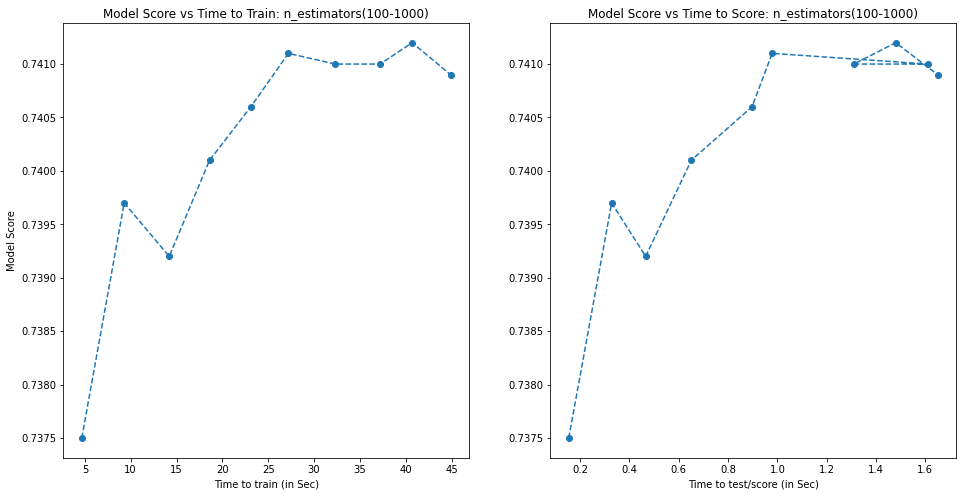

In [67]:
# Plotting performance vs score of different number of trees

fig, ax = plt.subplots(1,2, figsize = (16,8))

ax[0].plot(train_time, score, marker='o', linestyle='dashed')
ax[0].set_xlabel('Time to train (in Sec)')
ax[0].set_ylabel('Model Score')
ax[0].set_title('Model Score vs Time to Train: n_estimators(100-1000)')

ax[1].plot(score_time, score, marker='o', linestyle='dashed')
ax[1].set_xlabel('Time to test/score (in Sec)')
ax[1].set_title('Model Score vs Time to Score: n_estimators(100-1000)')

### Observations
1. The score plateaus after 600 trees
2. Model with 600 trees takes 3x more time than 200 trees with score of 0.7411 vs 0.7397
3. 200 trees/estimators will be selected for the final model due to performance advantage

In [68]:
# Using Extra Trees regressor (Model of choice with highest score)

etr = ExtraTreesRegressor(n_estimators=200, random_state=42, max_depth=30)
etr.fit(X_train, y_train)
etr.score(X_test, y_test)

0.740844651503848

In [69]:
y_pred = etr.predict(X_test)

Text(0.5, 1.0, 'Prediction vs Actual log energy use')

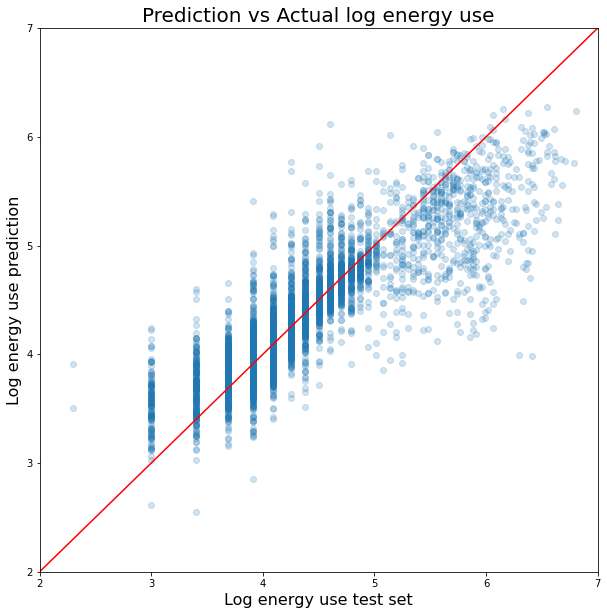

In [70]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, marker='o', alpha=0.2)
plt.xlim(2, 7)
plt.ylim(2, 7)
#plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), c='r')
plt.plot(np.linspace(2, 7, 10), np.linspace(2, 7, 10), c='r')
plt.xlabel('Log energy use test set', size=16)
plt.ylabel('Log energy use prediction', size = 16)
plt.title('Prediction vs Actual log energy use', size = 20)

In [71]:
# Computing Root Mean Squared Error

RMSE = np.sqrt(np.mean((y_pred - y_test)**2))
RMSE

0.33635859292259385

In [72]:
# Computing Mean Absolute Percentage Error

MAPE = np.mean(np.abs(y_pred - y_test)/y_test)
MAPE

0.050991611243382785